# Import Libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as shc

from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

# Read Data

In [ ]:
data = pd.read_csv('/content/CC GENERAL.csv')
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# EDA

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
round(data.isnull().sum(axis=0)*100/data.shape[0],2)

CUST_ID                             0.00
BALANCE                             0.00
BALANCE_FREQUENCY                   0.00
PURCHASES                           0.00
ONEOFF_PURCHASES                    0.00
INSTALLMENTS_PURCHASES              0.00
CASH_ADVANCE                        0.00
PURCHASES_FREQUENCY                 0.00
ONEOFF_PURCHASES_FREQUENCY          0.00
PURCHASES_INSTALLMENTS_FREQUENCY    0.00
CASH_ADVANCE_FREQUENCY              0.00
CASH_ADVANCE_TRX                    0.00
PURCHASES_TRX                       0.00
CREDIT_LIMIT                        0.01
PAYMENTS                            0.00
MINIMUM_PAYMENTS                    3.50
PRC_FULL_PAYMENT                    0.00
TENURE                              0.00
dtype: float64

In [ ]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
data.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531283,0.322802,0.398684,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095843,0.065008,0.132569,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356963,0.603264,0.093860,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319724,0.567292,0.048755,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256499,0.384084,0.132172,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303985,0.453238,0.140107,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119788,0.103464,0.003030,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295038,0.243537,-0.030327,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060755,0.085551,0.030073,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.098838,-0.249773,-0.133372


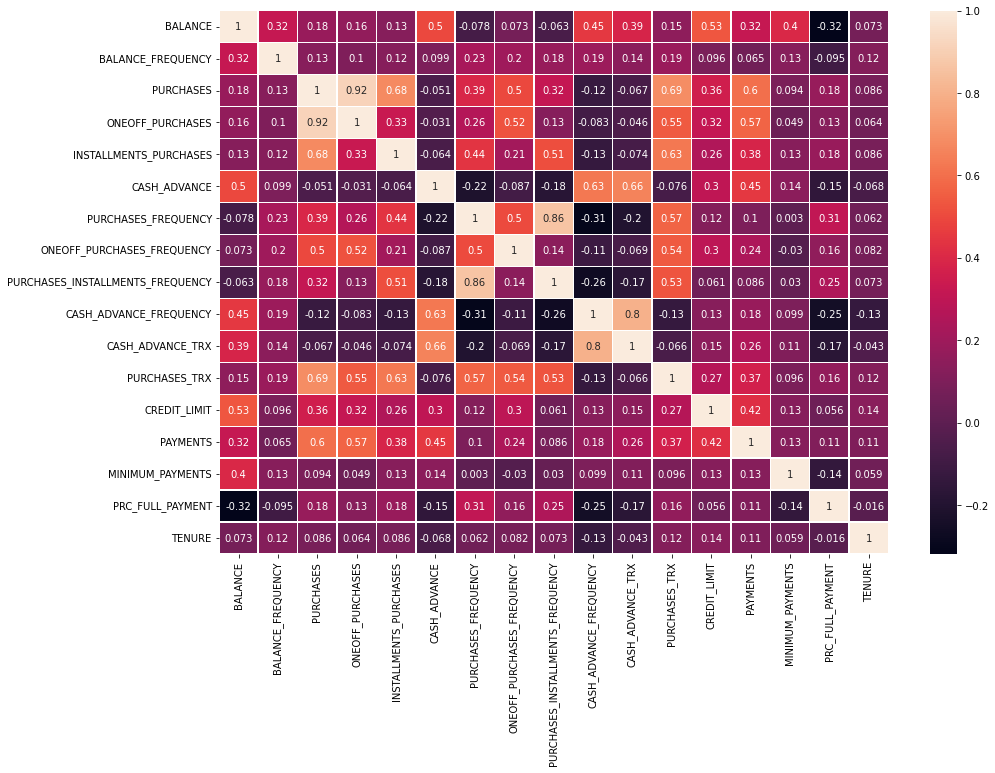

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
_ = sns.heatmap(data.corr(), annot=True, linewidths=.5, ax=ax)

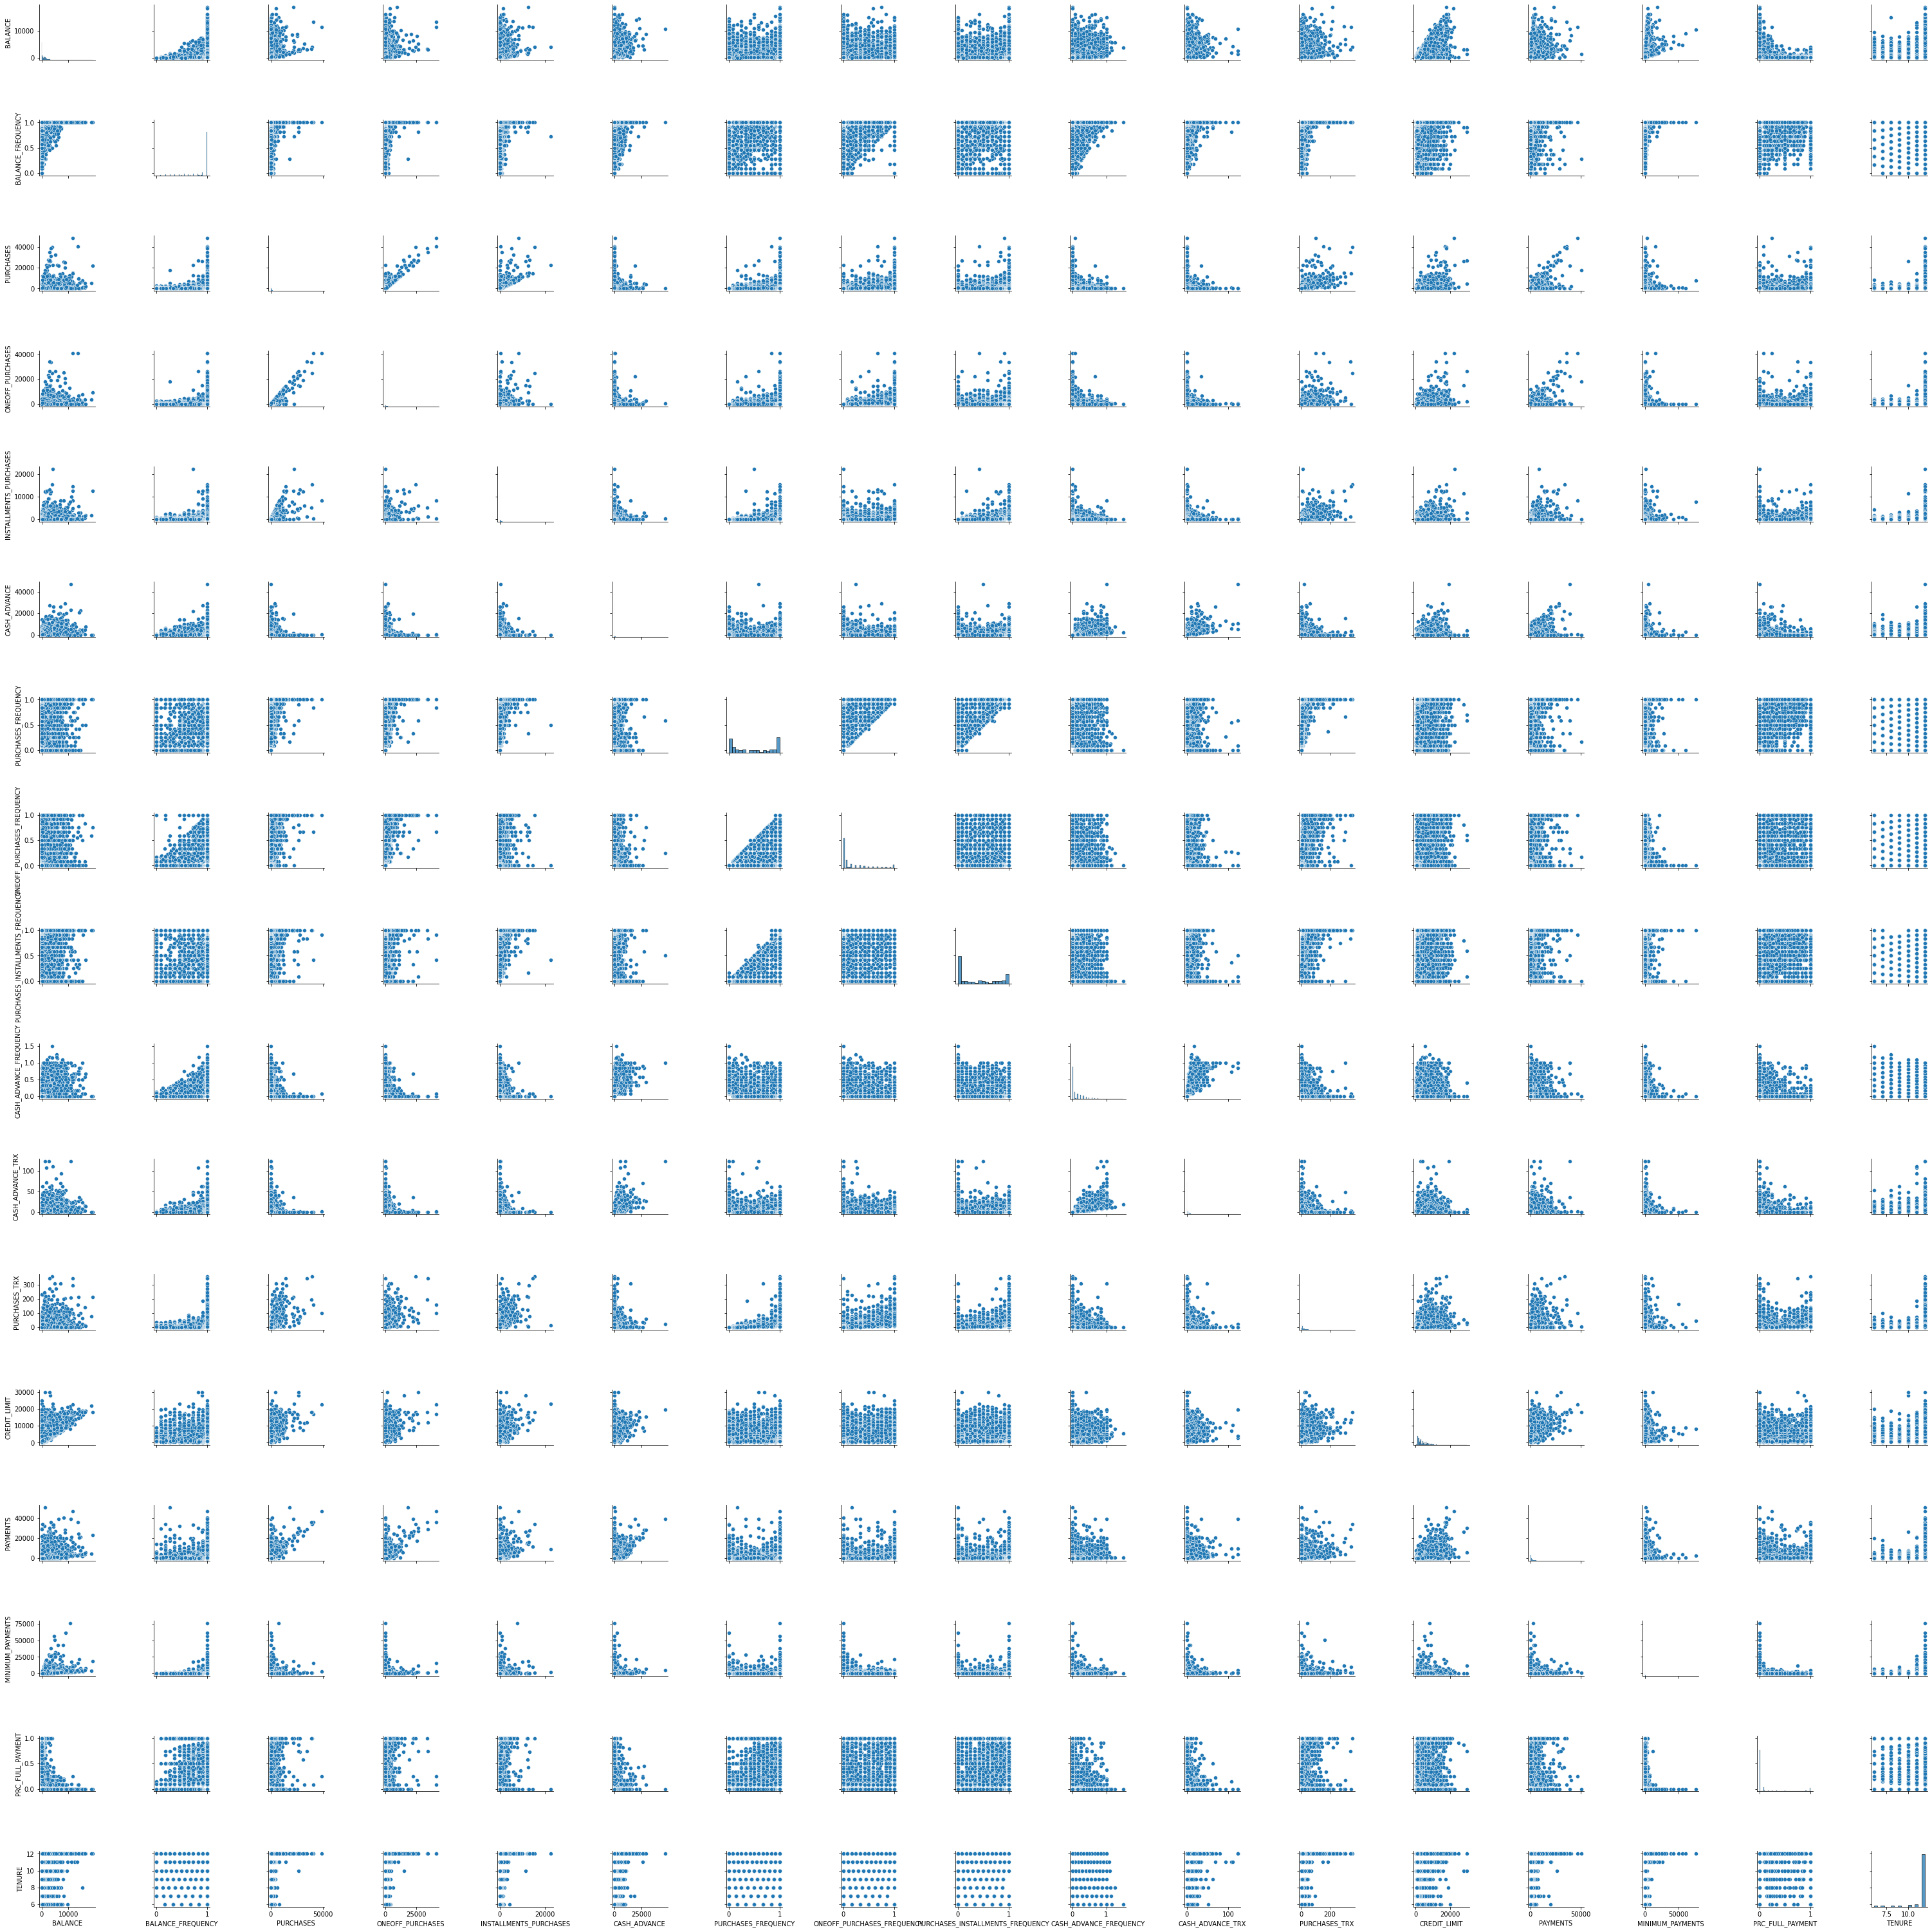

In [ ]:
sns.pairplot(data)

##### Drop customer ID columns

In [ ]:
data = data.drop(columns='CUST_ID')
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


##### Most of payments that have minimum payments = NULL are 0

In [ ]:
data[data['MINIMUM_PAYMENTS'].isnull()]['PAYMENTS'].describe()

count      313.000000
mean       322.286168
std       1996.658905
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      29272.486070
Name: PAYMENTS, dtype: float64

In [ ]:
data[data['MINIMUM_PAYMENTS'].isnull()]['PAYMENTS'].value_counts()

0.000000       240
861.744611       1
127.996550       1
198.562574       1
382.210790       1
              ... 
368.807294       1
2437.932505      1
692.523718       1
415.603589       1
275.861322       1
Name: PAYMENTS, Length: 74, dtype: int64

##### Fill minimum payments with 0

In [ ]:
data['MINIMUM_PAYMENTS'] = data['MINIMUM_PAYMENTS'].fillna(0)

Fill Credit limit null values

In [ ]:
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].median(), inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

##### Visualize distribution and outliers

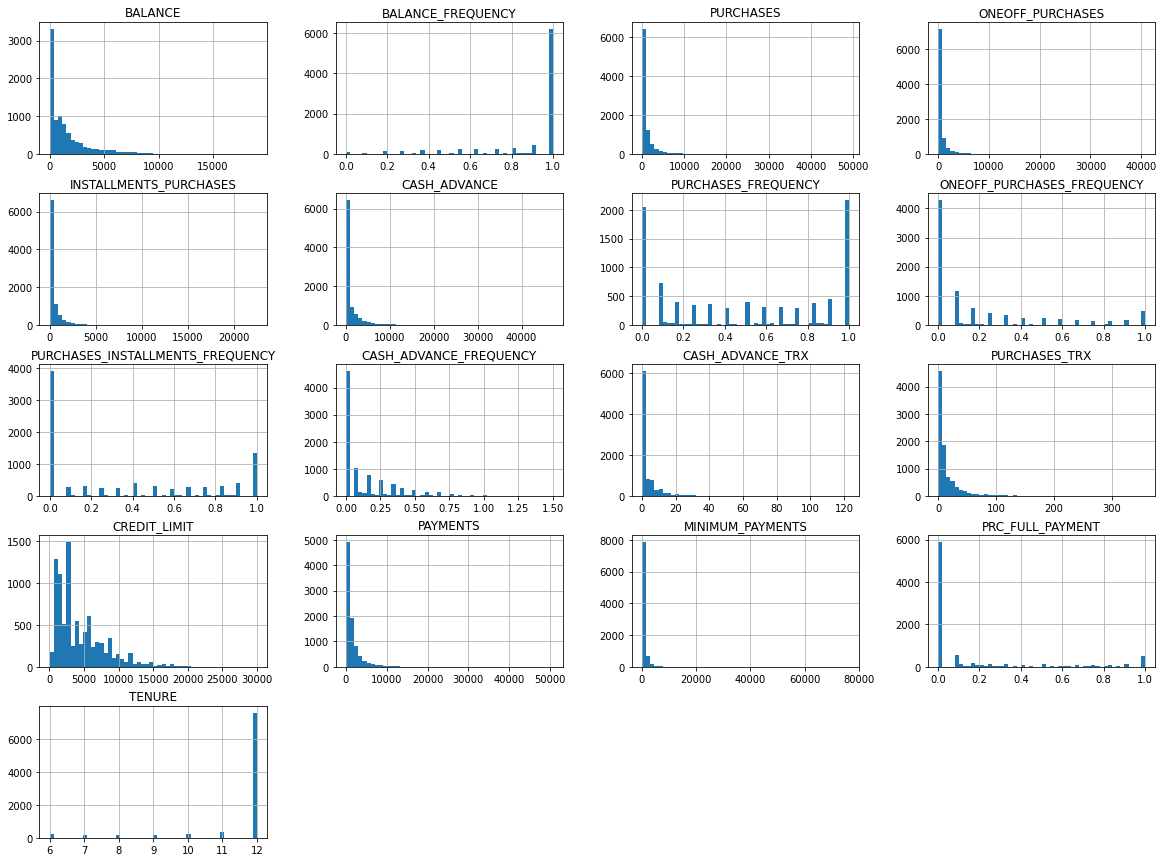

In [ ]:
_ = data.hist(bins=50, figsize=(20, 15))

Here it's not reasonable to consider bank transactions values as outliers

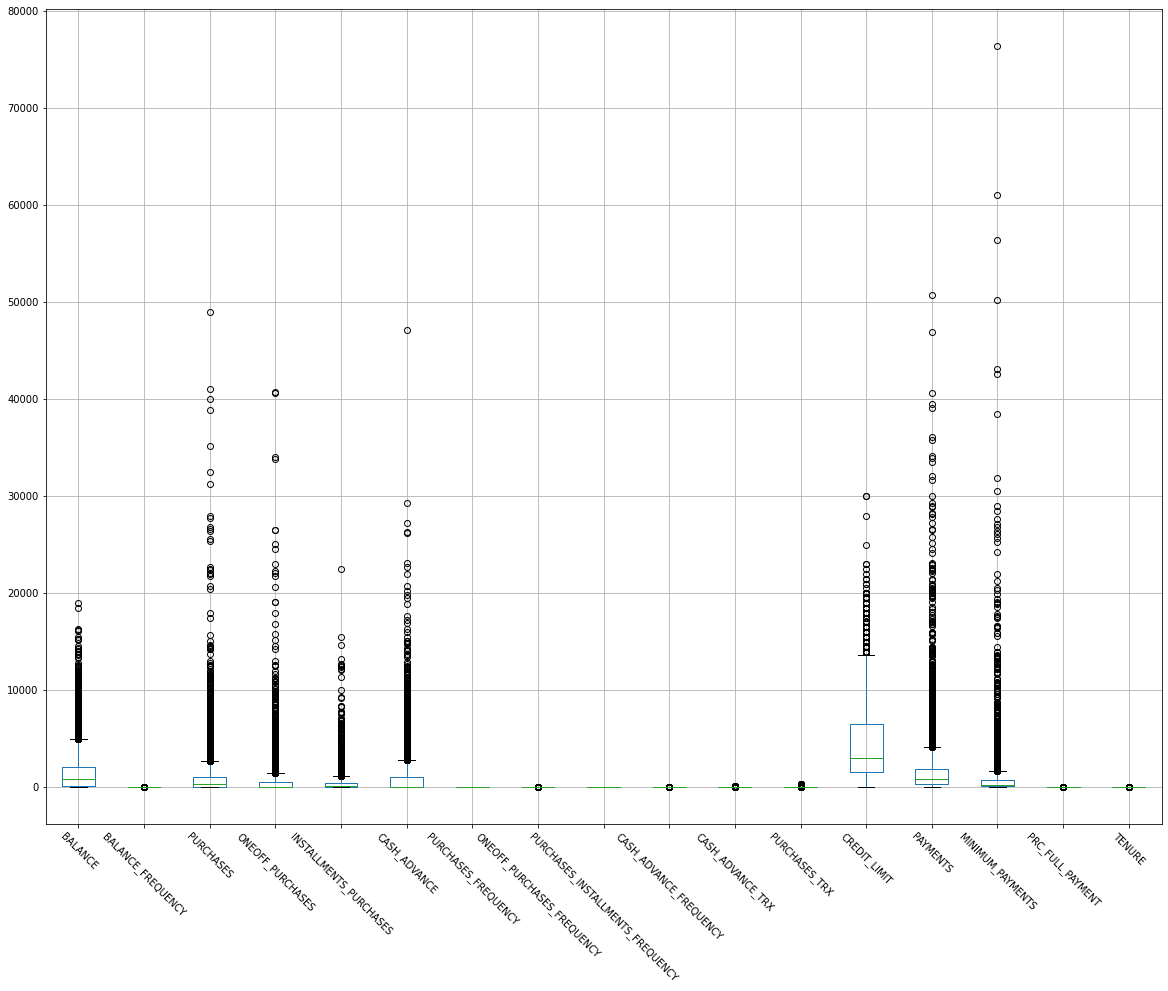

In [ ]:
_ = data.boxplot(figsize=(20, 15))
_ = plt.xticks(rotation = -45)

##### Feature Scaling
Scale features that out of range [0, 1]

In [ ]:
from sklearn.preprocessing import StandardScaler
for column in data.columns:
    data[column] = StandardScaler().fit_transform(data[[column]])

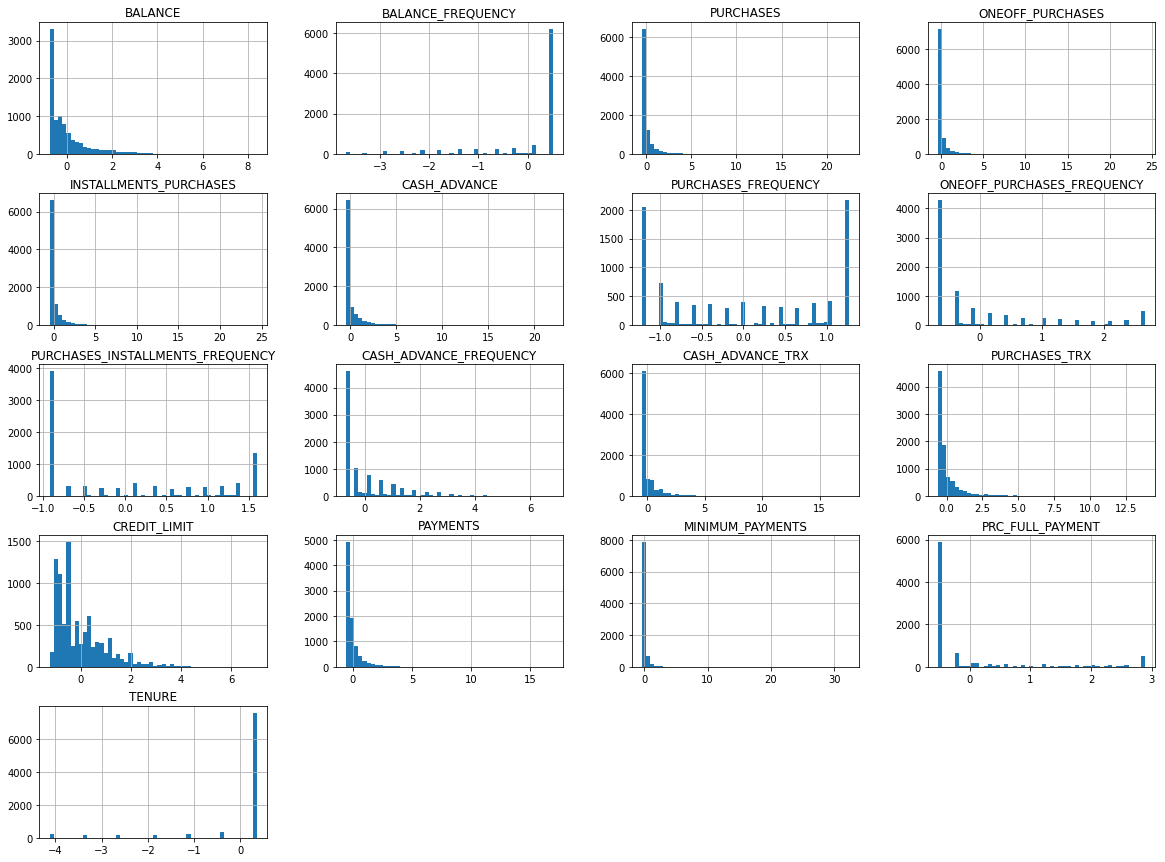

In [ ]:
_ = data.hist(bins=50, figsize=(20, 15))

# Models

## K-Means

##### Here, we can say the the best number of cluster is **9** as it maps a good value for distortion and Silhouette Score 

In [ ]:
distortions = []
for k in range(2, 25):
    model = KMeans(k)
    model.fit(data)
    distortions.append(model.inertia_)
    score = silhouette_score(data, model.labels_)

    print(f'For k = {k}\n')
    print(f'\tSilhouette Score: {score}\n')
    print(f'\tDistortion: {model.inertia_}\n')
    print(f'\tClusters Distribution: {Counter(model.labels_)}\n')
    print('********************\n')

For k = 2

	Silhouette Score: 0.2095410472173432

	Distortion: 127784.14454908678

	Clusters Distribution: Counter({0: 5225, 1: 3725})

********************

For k = 3

	Silhouette Score: 0.250676910502909

	Distortion: 111967.34941287483

	Clusters Distribution: Counter({0: 6120, 1: 1597, 2: 1233})

********************

For k = 4

	Silhouette Score: 0.1976743333136725

	Distortion: 99055.85473517026

	Clusters Distribution: Counter({0: 3977, 1: 3367, 3: 1197, 2: 409})

********************

For k = 5

	Silhouette Score: 0.1932395807233445

	Distortion: 91485.12916968961

	Clusters Distribution: Counter({4: 3913, 3: 2416, 0: 1383, 2: 1152, 1: 86})

********************

For k = 6

	Silhouette Score: 0.20344079112798474

	Distortion: 85757.1388176817

	Clusters Distribution: Counter({0: 3639, 5: 2221, 1: 1312, 2: 1041, 4: 652, 3: 85})

********************

For k = 7

	Silhouette Score: 0.2080779491113865

	Distortion: 79717.98930706456

	Clusters Distribution: Counter({1: 2915, 0: 218

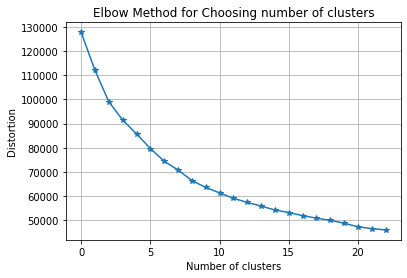

In [ ]:
plt.plot(distortions, marker='*')
plt.title('Elbow Method for Choosing number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.grid()

## DBSCAN

##### Here elbow method implies that best value for epsilon in range [2, 3]

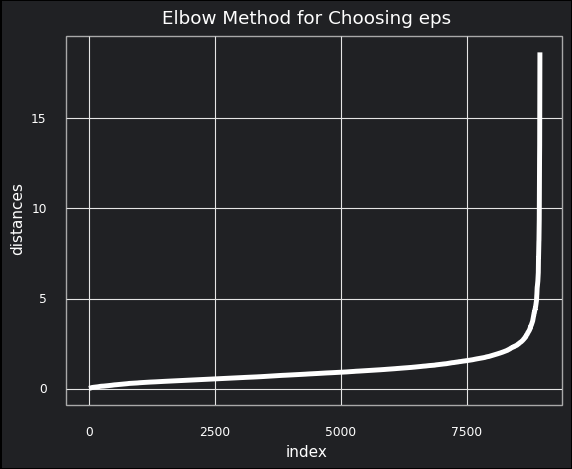

In [ ]:
# we ask for mins + 1 nearest, because the data point it self (distance = 0) is included
mins = 3
nn = NearestNeighbors(n_neighbors=mins + 1)

nn.fit(data)

distances, neighbors = nn.kneighbors(data)

# sort the distances
distances = np.sort(distances[:, mins], axis = 0)

#plot the distances
distances_df = pd.DataFrame({"distances": distances,
                             "index": list(range(0,len(distances)))})
print(ggplot(distances_df, aes(x = "index", y = "distances")) +
 geom_line(color = "white", size = 2) + theme_minimal() +
 labs(title = "Elbow Method for Choosing eps") +
 theme(panel_grid_minor = element_blank(),
      rect = element_rect(fill = "#202124ff"),
      axis_text = element_text(color = "white"),
      axis_title = element_text(color = "white"),
      plot_title = element_text(color = "white"),
      panel_border = element_line(color = "darkgray"),
      plot_background = element_rect(fill = "#202124ff")
      ))

##### Grid search for DBSCAN Parameters

In [ ]:
def dbscan_grid_search(data, eps_space = 0.5,
                       min_samples_space = 5, min_clust = 1, max_clust = 10):

    """
Performs a hyperparameter grid search for DBSCAN.

Parameters:
    * data            = data used to fit the DBSCAN instance
    * eps_space         = the range values for the eps parameter
    * min_samples_space = the range values for the min_samples parameter
    * min_clust         = the minimum number of clusters required after each search iteration in order for a result to be appended to the lst
    * max_clust         = the maximum number of clusters required after each search iteration in order for a result to be appended to the lst

"""

    # Importing counter to count the amount of data in each cluster
    from collections import Counter


    # Starting a tally of total iterations
    n_iterations = 0

    dbscan_clusters = []
    cluster_count = []
    silhouette_scores = []

    # Looping over each combination of hyperparameters
    for eps_val in eps_space:
        for samples_val in min_samples_space:

            dbscan_grid = DBSCAN(eps = eps_val,
                                 min_samples = samples_val)


            # fit_transform
            dbscan_grid.fit(X = data)


            # Counting the amount of data in each cluster
            clst_count = Counter(dbscan_grid.labels_)


            # Saving the number of clusters
            n_clusters = sum(abs(pd.np.unique(dbscan_grid.labels_))) - 1


            # Increasing the iteration tally with each run of the loop
            n_iterations += 1


            # Appending the lists each time n_clusters criteria is reached
            if max_clust >= n_clusters >= min_clust:

                dbscan_clusters.append([eps_val,
                                        samples_val,
                                        n_clusters])


                cluster_count.append(clst_count)
                silhouette_scores.append(silhouette_score(data, dbscan_grid.labels_))

    # Printing grid search summary information
    print(f"""Search Complete. \nYour list is now of length {len(dbscan_clusters)}. """)
    print(f"""Hyperparameter combinations checked: {n_iterations}. \n""")

    return dbscan_clusters, cluster_count, silhouette_scores

In [ ]:
dbscan_clusters, cluster_count, scores = dbscan_grid_search(data=data,
                   eps_space = pd.np.arange(0.1, 5, 0.5),
                   min_samples_space = pd.np.arange(1, 50, 1))

Search Complete. 
Your list is now of length 96. 
Hyperparameter combinations checked: 490. 



Show result in dataframe for better visualization

In [ ]:
dbscan_clusters_df = pd.DataFrame(dbscan_clusters, columns=['Epsilon', 'Minimum samples', 'Number of clusters'])
dbscan_clusters_df.head()

,Epsilon,Minimum samples,Number of clusters
0,0.1,6,3
1,0.1,7,3
2,0.1,8,1
3,0.1,9,1
4,0.1,10,1


Rename dataframe columns

In [ ]:
cluster_count_df = pd.DataFrame(cluster_count)
cluster_count_df.head()

,-1,0,2,1,4,3
0,8870,59,9.0,12,NaN,NaN
1,8873,57,9.0,11,NaN,NaN
2,8883,56,NaN,11,NaN,NaN
3,8888,51,NaN,11,NaN,NaN
4,8888,51,NaN,11,NaN,NaN


In [ ]:
column_names = []
for cluster_number in cluster_count_df.columns:
  if cluster_number == -1:
    cluster_count_df.rename(columns={cluster_number:'Noise'}, inplace=True)
  else:
    cluster_count_df.rename(columns={cluster_number:'Cluster ' + str(cluster_number+1)}, inplace=True)

cluster_count_df.columns

Index(['Noise', 'Cluster 1', 'Cluster 3', 'Cluster 2', 'Cluster 5',
       'Cluster 4'],
      dtype='object')

Sort columns by name

In [ ]:
cluster_count_df = cluster_count_df.reindex(sorted(cluster_count_df.columns), axis=1)
cluster_count_df.head()

,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Noise
0,59,12,9.0,NaN,NaN,8870
1,57,11,9.0,NaN,NaN,8873
2,56,11,NaN,NaN,NaN,8883
3,51,11,NaN,NaN,NaN,8888
4,51,11,NaN,NaN,NaN,8888


In [ ]:
scores_df = pd.DataFrame(scores, columns=['Silhouette Score'])
scores_df.head()

,Silhouette Score
0,-0.255662
1,-0.256042
2,-0.253304
3,-0.253642
4,-0.253642


Merge all results in one dataframe for better visualization

In [ ]:
dbscan_result = dbscan_clusters_df.join(cluster_count_df).join(scores_df)
dbscan_result.head()

,Epsilon,Minimum samples,Number of clusters,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Noise,Silhouette Score
0,0.1,6,3,59,12,9.0,NaN,NaN,8870,-0.255662
1,0.1,7,3,57,11,9.0,NaN,NaN,8873,-0.256042
2,0.1,8,1,56,11,NaN,NaN,NaN,8883,-0.253304
3,0.1,9,1,51,11,NaN,NaN,NaN,8888,-0.253642
4,0.1,10,1,51,11,NaN,NaN,NaN,8888,-0.253642


In [ ]:
dbscan_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Epsilon             96 non-null     float64
 1   Minimum samples     96 non-null     int64  
 2   Number of clusters  96 non-null     int64  
 3   Cluster 1           96 non-null     int64  
 4   Cluster 2           96 non-null     int64  
 5   Cluster 3           54 non-null     float64
 6   Cluster 4           22 non-null     float64
 7   Cluster 5           9 non-null      float64
 8   Noise               96 non-null     int64  
 9   Silhouette Score    96 non-null     float64
dtypes: float64(5), int64(5)
memory usage: 7.6 KB


In [ ]:
dbscan_result.isnull().sum()

Epsilon                0
Minimum samples        0
Number of clusters     0
Cluster 1              0
Cluster 2              0
Cluster 3             42
Cluster 4             74
Cluster 5             87
Noise                  0
Silhouette Score       0
dtype: int64

Fill null values by 0

In [ ]:
dbscan_result = dbscan_result.fillna(0)
dbscan_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Epsilon             96 non-null     float64
 1   Minimum samples     96 non-null     int64  
 2   Number of clusters  96 non-null     int64  
 3   Cluster 1           96 non-null     int64  
 4   Cluster 2           96 non-null     int64  
 5   Cluster 3           96 non-null     float64
 6   Cluster 4           96 non-null     float64
 7   Cluster 5           96 non-null     float64
 8   Noise               96 non-null     int64  
 9   Silhouette Score    96 non-null     float64
dtypes: float64(5), int64(5)
memory usage: 7.6 KB


In [ ]:
dbscan_result.describe()

,Epsilon,Minimum samples,Number of clusters,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Noise,Silhouette Score
count,96.000000,96.00000,96.000000,96.00000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,1.120833,23.78125,3.187500,3796.59375,100.072917,34.791667,6.802083,2.385417,5009.354167,0.002402
std,0.994502,14.23724,2.758003,2897.69089,109.965185,53.230762,15.159933,8.898693,2800.112592,0.245522
min,0.100000,3.00000,1.000000,22.00000,3.000000,0.000000,0.000000,0.000000,62.000000,-0.256042
25%,0.600000,10.00000,1.000000,1052.75000,18.000000,0.000000,0.000000,0.000000,3363.750000,-0.195357
50%,1.100000,22.00000,3.000000,4604.50000,36.000000,4.000000,0.000000,0.000000,4290.000000,-0.067947
75%,1.100000,36.25000,3.000000,5551.25000,211.750000,55.750000,0.000000,0.000000,7370.250000,0.090277
max,4.600000,49.00000,10.000000,8883.00000,368.000000,178.000000,52.000000,44.000000,8905.000000,0.711669


Check the best 3 combinations based on Silhouette Score

But It's not resonable to find all the data in one cluster !<br>
So DBSCAN doesn't perform well on this data

In [ ]:
dbscan_result.sort_values(by=['Silhouette Score'], ascending=False)[:3]

,Epsilon,Minimum samples,Number of clusters,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Noise,Silhouette Score
93,4.6,3,1,8883,5,0.0,0.0,0.0,62,0.711669
94,4.6,4,1,8882,5,0.0,0.0,0.0,63,0.711508
95,4.6,5,1,8880,5,0.0,0.0,0.0,65,0.711336


## Hierarchical

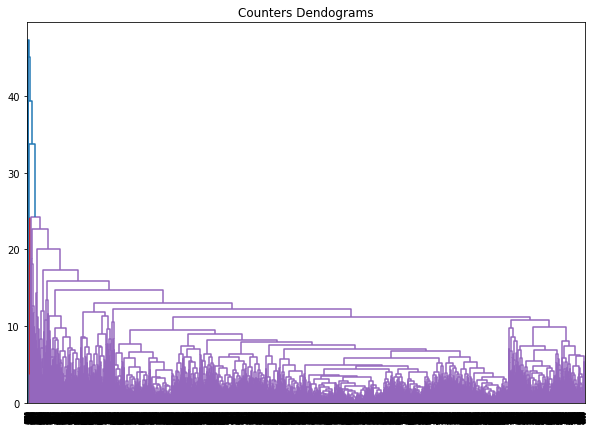

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=data , method='complete',metric='euclidean'),orientation='top')

##### Here, we can say the the best number of cluster is **8** as it maps a good value for Silhouette Score and clusters distribution

In [ ]:
for i in range(2, 10):
  model = AgglomerativeClustering(n_clusters=i)
  model.fit(data)
  score = silhouette_score(data, labels=model.labels_, metric='euclidean')
  
  print(f'For n_cluster = {i}\n')
  print(f'\tSilhouette Score: {score}\n')
  print(f'\tClusters Distribution: {Counter(model.labels_)}\n')
  print('********************\n')

For n_cluster = 2

	Silhouette Score: 0.1882571546260406

	Clusters Distribution: Counter({0: 6168, 1: 2782})

********************

For n_cluster = 3

	Silhouette Score: 0.1759267718507881

	Clusters Distribution: Counter({1: 4768, 0: 2782, 2: 1400})

********************

For n_cluster = 4

	Silhouette Score: 0.17750138482475994

	Clusters Distribution: Counter({1: 4768, 0: 2759, 2: 1400, 3: 23})

********************

For n_cluster = 5

	Silhouette Score: 0.13852652627948261

	Clusters Distribution: Counter({0: 4768, 1: 2015, 2: 1400, 4: 744, 3: 23})

********************

For n_cluster = 6

	Silhouette Score: 0.126180998610236

	Clusters Distribution: Counter({2: 2567, 0: 2201, 1: 2015, 5: 1400, 4: 744, 3: 23})

********************

For n_cluster = 7

	Silhouette Score: 0.15280971806690194

	Clusters Distribution: Counter({0: 2567, 1: 2015, 6: 1472, 2: 1400, 4: 744, 5: 729, 3: 23})

********************

For n_cluster = 8

	Silhouette Score: 0.1502451497181007

	Clusters Distribut

## GaussianMixture

##### Here, we can say the the best number of cluster is **2** as it maps a good value for Silhouette Score and clusters distribution

In [ ]:
for i in range(2, 10):
  model = GaussianMixture(i)
  labels = model.fit_predict(data)
  score = silhouette_score(data, labels=labels, metric='euclidean')
  
  print(f'For n_cluster = {i}\n')
  print(f'\tSilhouette Score: {score}\n')
  print(f'\tClusters Distribution: {Counter(labels)}\n')
  print('********************\n')

For n_cluster = 2

	Silhouette Score: 0.18446997640056997

	Clusters Distribution: Counter({1: 5758, 0: 3192})

********************

For n_cluster = 3

	Silhouette Score: 0.11025855863488389

	Clusters Distribution: Counter({1: 3940, 0: 2822, 2: 2188})

********************

For n_cluster = 4

	Silhouette Score: 0.1028631312257011

	Clusters Distribution: Counter({2: 3711, 3: 2746, 0: 1648, 1: 845})

********************

For n_cluster = 5

	Silhouette Score: 0.07334757403209848

	Clusters Distribution: Counter({3: 2723, 0: 2517, 4: 1769, 2: 1464, 1: 477})

********************

For n_cluster = 6

	Silhouette Score: 0.05096140467891086

	Clusters Distribution: Counter({2: 2793, 5: 2444, 1: 1944, 0: 875, 4: 510, 3: 384})

********************

For n_cluster = 7

	Silhouette Score: 0.039167280595269895

	Clusters Distribution: Counter({1: 2385, 3: 2157, 4: 1252, 0: 1174, 2: 860, 5: 705, 6: 417})

********************

For n_cluster = 8

	Silhouette Score: 0.03318524486024238

	Clusters 

# Dimensionality Reduction using PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=None)
pca.fit(data)

exp_var = pca.explained_variance_ratio_ * 100
cum_exp_var = np.cumsum(exp_var)

##### Individual explained varinace for every feature

In [ ]:
print('Explained varinace for every feature:')
print('*************************************\n')

for i, column in enumerate(data.columns):
  print(f'{column}: {exp_var[i]:.3f} %\n')

Explained varinace for every feature:
*************************************

BALANCE: 27.302 %

BALANCE_FREQUENCY: 20.320 %

PURCHASES: 8.825 %

ONEOFF_PURCHASES: 7.479 %

INSTALLMENTS_PURCHASES: 6.204 %

CASH_ADVANCE: 5.733 %

PURCHASES_FREQUENCY: 4.882 %

ONEOFF_PURCHASES_FREQUENCY: 4.324 %

PURCHASES_INSTALLMENTS_FREQUENCY: 3.780 %

CASH_ADVANCE_FREQUENCY: 3.080 %

CASH_ADVANCE_TRX: 2.372 %

PURCHASES_TRX: 1.773 %

CREDIT_LIMIT: 1.429 %

PAYMENTS: 1.217 %

MINIMUM_PAYMENTS: 1.013 %

PRC_FULL_PAYMENT: 0.267 %

TENURE: 0.000 %



##### Cumulative Explained varinace for features

In [ ]:
print('Cumulative Explained varinace for features:')
print('*******************************************\n')

for i in range(len(cum_exp_var)):
  print(f'{i+1} principle components: {cum_exp_var[i]:.3f} %\n')

Cumulative Explained varinace for features:
*******************************************

1 principle components: 27.302 %

2 principle components: 47.622 %

3 principle components: 56.447 %

4 principle components: 63.926 %

5 principle components: 70.130 %

6 principle components: 75.864 %

7 principle components: 80.745 %

8 principle components: 85.070 %

9 principle components: 88.849 %

10 principle components: 91.929 %

11 principle components: 94.302 %

12 principle components: 96.075 %

13 principle components: 97.504 %

14 principle components: 98.720 %

15 principle components: 99.733 %

16 principle components: 100.000 %

17 principle components: 100.000 %



##### Plot individual explained variance with its cumulation

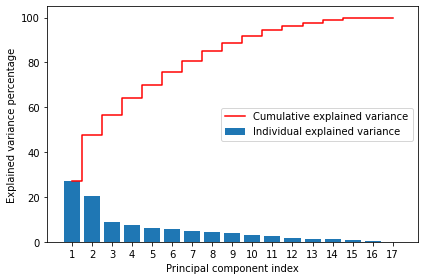

In [ ]:
plt.bar(range(1, len(exp_var)+1), exp_var, align='center',
        label='Individual explained variance')

plt.step(range(1, len(exp_var)+1), cum_exp_var, where='mid',
         label='Cumulative explained variance', color='red')

plt.xlabel('Principal component index')
plt.ylabel('Explained variance percentage')
plt.xticks(ticks=range(1, len(exp_var)+1))
plt.legend(loc='best')
plt.tight_layout()

#### So as we saw above we can represent almost 90% of the data by 10 features 

Useful note: we can choose an exact amount of variance to be kept in data by specifying a float between 0 and 1 to the hyperparameter n_components.
ex: `pca = PCA(n_components=0.9)`

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
data = pca.fit_transform(data)

data.shape

(8950, 10)

# Models after applying PCA

## K-Means

##### Here, we can say the the best number of cluster is **9** as it maps a good value for distortion and Silhouette Score 

In [ ]:
distortions = []
for k in range(2, 25):
    model = KMeans(k)
    model.fit(data)
    distortions.append(model.inertia_)
    score = silhouette_score(data, model.labels_)

    print(f'For k = {k}\n')
    print(f'\tSilhouette Score: {score}\n')
    print(f'\tDistortion: {model.inertia_}\n')
    print(f'\tClusters Distribution: {Counter(model.labels_)}\n')
    print('********************\n')

For k = 2

	Silhouette Score: 0.22455532073910553

	Distortion: 115530.23795382408

	Clusters Distribution: Counter({1: 5249, 0: 3701})

********************

For k = 3

	Silhouette Score: 0.25866258774361034

	Distortion: 99797.20037799595

	Clusters Distribution: Counter({0: 6108, 1: 1600, 2: 1242})

********************

For k = 4

	Silhouette Score: 0.21690806959968312

	Distortion: 86964.24960471486

	Clusters Distribution: Counter({0: 4008, 2: 3334, 3: 1199, 1: 409})

********************

For k = 5

	Silhouette Score: 0.2111245665232238

	Distortion: 79574.79477231283

	Clusters Distribution: Counter({3: 3920, 0: 2426, 4: 1366, 1: 1155, 2: 83})

********************

For k = 6

	Silhouette Score: 0.22410764323932403

	Distortion: 72927.71771700484

	Clusters Distribution: Counter({1: 3043, 0: 2233, 4: 1322, 3: 1315, 5: 951, 2: 86})

********************

For k = 7

	Silhouette Score: 0.22887924909517113

	Distortion: 68246.12892640938

	Clusters Distribution: Counter({2: 2924, 4

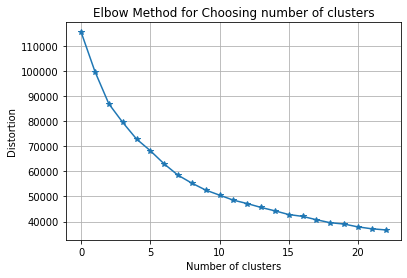

In [ ]:
plt.plot(distortions, marker='*')
plt.title('Elbow Method for Choosing number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.grid()

## DBSCAN

##### Here elbow method implies that best value for epsilon in range [2, 3]

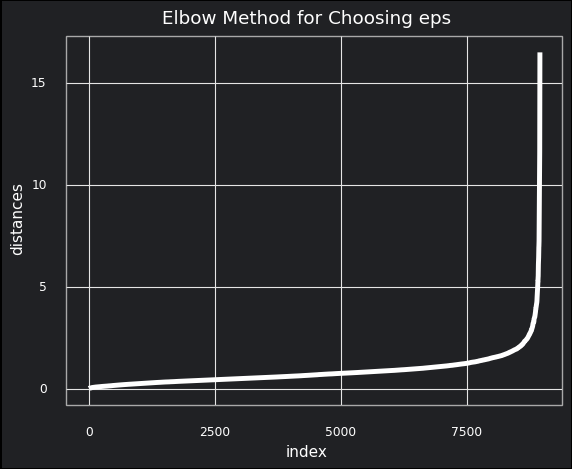

In [ ]:
# we ask for mins + 1 nearest, because the data point it self (distance = 0) is included
mins = 3
nn = NearestNeighbors(n_neighbors=mins + 1)

nn.fit(data)

distances, neighbors = nn.kneighbors(data)

# sort the distances
distances = np.sort(distances[:, mins], axis = 0)

#plot the distances
distances_df = pd.DataFrame({"distances": distances,
                             "index": list(range(0,len(distances)))})
print(ggplot(distances_df, aes(x = "index", y = "distances")) +
 geom_line(color = "white", size = 2) + theme_minimal() +
 labs(title = "Elbow Method for Choosing eps") +
 theme(panel_grid_minor = element_blank(),
      rect = element_rect(fill = "#202124ff"),
      axis_text = element_text(color = "white"),
      axis_title = element_text(color = "white"),
      plot_title = element_text(color = "white"),
      panel_border = element_line(color = "darkgray"),
      plot_background = element_rect(fill = "#202124ff")
      ))

##### Grid search for DBSCAN Parameters

In [ ]:
dbscan_clusters, cluster_count, scores = dbscan_grid_search(data=data,
                   eps_space = pd.np.arange(0.1, 5, 0.5),
                   min_samples_space = pd.np.arange(1, 50, 1))

Search Complete. 
Your list is now of length 74. 
Hyperparameter combinations checked: 490. 



In [ ]:
dbscan_clusters_df = pd.DataFrame(dbscan_clusters, columns=['Epsilon', 'Minimum samples', 'Number of clusters'])
dbscan_clusters_df.head()

,Epsilon,Minimum samples,Number of clusters
0,0.1,8,3
1,0.1,9,3
2,0.1,10,3
3,0.1,11,1
4,0.1,12,1


Rename dataframe columns

In [ ]:
cluster_count_df = pd.DataFrame(cluster_count)
cluster_count_df.head()

,-1,0,1,2,3,4
0,8838,75,22,15.0,NaN,NaN
1,8849,14,72,15.0,NaN,NaN
2,8853,72,15,10.0,NaN,NaN
3,8865,70,15,NaN,NaN,NaN
4,8872,66,12,NaN,NaN,NaN


In [ ]:
column_names = []
for cluster_number in cluster_count_df.columns:
  if cluster_number == -1:
    cluster_count_df.rename(columns={cluster_number:'Noise'}, inplace=True)
  else:
    cluster_count_df.rename(columns={cluster_number:'Cluster ' + str(cluster_number+1)}, inplace=True)

cluster_count_df.columns

Index(['Noise', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4',
       'Cluster 5'],
      dtype='object')

Sort columns by name

In [ ]:
cluster_count_df = cluster_count_df.reindex(sorted(cluster_count_df.columns), axis=1)
cluster_count_df.head()

,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Noise
0,75,22,15.0,NaN,NaN,8838
1,14,72,15.0,NaN,NaN,8849
2,72,15,10.0,NaN,NaN,8853
3,70,15,NaN,NaN,NaN,8865
4,66,12,NaN,NaN,NaN,8872


In [ ]:
scores_df = pd.DataFrame(scores, columns=['Silhouette Score'])
scores_df.head()

,Silhouette Score
0,-0.248663
1,-0.248645
2,-0.248318
3,-0.244741
4,-0.245100


Merge all results in one dataframe for better visualization

In [ ]:
dbscan_result = dbscan_clusters_df.join(cluster_count_df).join(scores_df)
dbscan_result.head()

,Epsilon,Minimum samples,Number of clusters,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Noise,Silhouette Score
0,0.1,8,3,75,22,15.0,NaN,NaN,8838,-0.248663
1,0.1,9,3,14,72,15.0,NaN,NaN,8849,-0.248645
2,0.1,10,3,72,15,10.0,NaN,NaN,8853,-0.248318
3,0.1,11,1,70,15,NaN,NaN,NaN,8865,-0.244741
4,0.1,12,1,66,12,NaN,NaN,NaN,8872,-0.245100


In [ ]:
dbscan_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Epsilon             74 non-null     float64
 1   Minimum samples     74 non-null     int64  
 2   Number of clusters  74 non-null     int64  
 3   Cluster 1           74 non-null     int64  
 4   Cluster 2           74 non-null     int64  
 5   Cluster 3           35 non-null     float64
 6   Cluster 4           10 non-null     float64
 7   Cluster 5           2 non-null      float64
 8   Noise               74 non-null     int64  
 9   Silhouette Score    74 non-null     float64
dtypes: float64(5), int64(5)
memory usage: 5.9 KB


In [ ]:
dbscan_result.isnull().sum()

Epsilon                0
Minimum samples        0
Number of clusters     0
Cluster 1              0
Cluster 2              0
Cluster 3             39
Cluster 4             64
Cluster 5             72
Noise                  0
Silhouette Score       0
dtype: int64

Fill null values by 0

In [ ]:
dbscan_result = dbscan_result.fillna(0)
dbscan_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Epsilon             74 non-null     float64
 1   Minimum samples     74 non-null     int64  
 2   Number of clusters  74 non-null     int64  
 3   Cluster 1           74 non-null     int64  
 4   Cluster 2           74 non-null     int64  
 5   Cluster 3           74 non-null     float64
 6   Cluster 4           74 non-null     float64
 7   Cluster 5           74 non-null     float64
 8   Noise               74 non-null     int64  
 9   Silhouette Score    74 non-null     float64
dtypes: float64(5), int64(5)
memory usage: 5.9 KB


In [ ]:
dbscan_result.describe()

,Epsilon,Minimum samples,Number of clusters,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Noise,Silhouette Score
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,1.086486,26.027027,2.459459,4469.905405,93.540541,18.500000,2.554054,0.432432,4365.067568,0.057631
std,0.895089,15.043292,2.041952,2749.953236,91.430067,26.859477,8.592992,3.281668,2680.711265,0.240647
min,0.100000,3.000000,1.000000,14.000000,3.000000,0.000000,0.000000,0.000000,42.000000,-0.248663
25%,0.600000,11.250000,1.000000,2025.250000,14.000000,0.000000,0.000000,0.000000,2395.500000,-0.090215
50%,1.100000,25.500000,1.000000,5432.500000,57.000000,0.000000,0.000000,0.000000,3381.000000,0.029230
75%,1.100000,40.000000,3.000000,6540.500000,175.500000,32.250000,0.000000,0.000000,6720.000000,0.135285
max,4.600000,49.000000,10.000000,8905.000000,266.000000,80.000000,43.000000,28.000000,8899.000000,0.745513


Check the best 3 combinations based on Silhouette Score

But It's not resonable to find all the data in one cluster !<br>
So DBSCAN doesn't perform well on this data

In [ ]:
dbscan_result.sort_values(by=['Silhouette Score'], ascending=False)[:3]

,Epsilon,Minimum samples,Number of clusters,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Noise,Silhouette Score
73,4.6,4,1,8905,3,0.0,0.0,0.0,42,0.745513
72,4.1,3,3,8895,4,3.0,0.0,0.0,48,0.716341
69,3.6,3,1,8880,3,0.0,0.0,0.0,67,0.714755


## Hierarchical

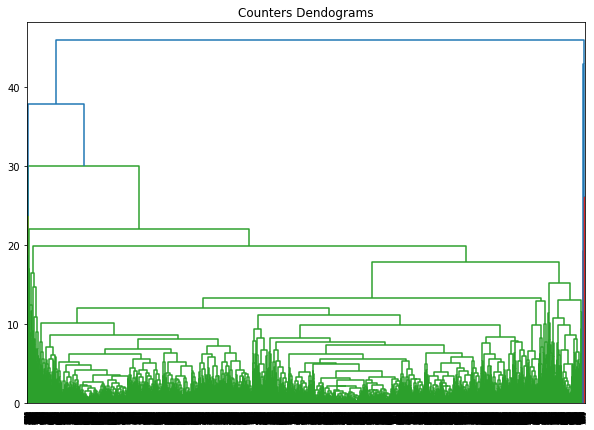

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=data , method='complete',metric='euclidean'),orientation='top')

##### Here, we can say the the best number of cluster is **2 or 3** as it maps a good value for Silhouette Score and clusters distribution

In [ ]:
for i in range(2, 10):
  model = AgglomerativeClustering(n_clusters=i)
  model.fit(data)
  score = silhouette_score(data, labels=model.labels_, metric='euclidean')
  
  print(f'For n_cluster = {i}\n')
  print(f'\tSilhouette Score: {score}\n')
  print(f'\tClusters Distribution: {Counter(model.labels_)}\n')
  print('********************\n')

For n_cluster = 2

	Silhouette Score: 0.19618242544343026

	Clusters Distribution: Counter({0: 5612, 1: 3338})

********************

For n_cluster = 3

	Silhouette Score: 0.18247574533009303

	Clusters Distribution: Counter({1: 4314, 0: 3338, 2: 1298})

********************

For n_cluster = 4

	Silhouette Score: 0.17142803340624152

	Clusters Distribution: Counter({1: 4314, 3: 2801, 2: 1298, 0: 537})

********************

For n_cluster = 5

	Silhouette Score: 0.17505959910219018

	Clusters Distribution: Counter({0: 4314, 1: 2801, 2: 1298, 3: 514, 4: 23})

********************

For n_cluster = 6

	Silhouette Score: 0.1886632298447055

	Clusters Distribution: Counter({0: 3703, 1: 2801, 2: 1298, 5: 611, 3: 514, 4: 23})

********************

For n_cluster = 7

	Silhouette Score: 0.16311868725630868

	Clusters Distribution: Counter({1: 2801, 2: 2330, 6: 1373, 0: 1298, 5: 611, 3: 514, 4: 23})

********************

For n_cluster = 8

	Silhouette Score: 0.16836412290031474

	Clusters Distr

## GaussianMixture

##### Here, we can say the the best number of cluster is **2** as it maps a good value for Silhouette Score and clusters distribution

In [ ]:
for i in range(2, 10):
  model = GaussianMixture(i)
  labels = model.fit_predict(data)
  score = silhouette_score(data, labels=labels, metric='euclidean')
  
  print(f'For n_cluster = {i}\n')
  print(f'\tSilhouette Score: {score}\n')
  print(f'\tClusters Distribution: {Counter(labels)}\n')
  print('********************\n')

For n_cluster = 2

	Silhouette Score: 0.20979986989045135

	Clusters Distribution: Counter({1: 5843, 0: 3107})

********************

For n_cluster = 3

	Silhouette Score: 0.0760836414098889

	Clusters Distribution: Counter({2: 4566, 0: 2547, 1: 1837})

********************

For n_cluster = 4

	Silhouette Score: 0.035842223250709494

	Clusters Distribution: Counter({2: 2973, 1: 2257, 0: 1886, 3: 1834})

********************

For n_cluster = 5

	Silhouette Score: 0.06420293256744149

	Clusters Distribution: Counter({2: 2651, 1: 2002, 3: 1766, 0: 1723, 4: 808})

********************

For n_cluster = 6

	Silhouette Score: 0.038643076007242275

	Clusters Distribution: Counter({3: 2151, 5: 2105, 2: 1579, 0: 1414, 4: 874, 1: 827})

********************

For n_cluster = 7

	Silhouette Score: 0.03997728241342554

	Clusters Distribution: Counter({3: 2013, 2: 1817, 5: 1291, 6: 1109, 1: 1107, 0: 858, 4: 755})

********************

For n_cluster = 8

	Silhouette Score: 0.004825762520597631

	Clus

# Extra

### Visualize data in 2D

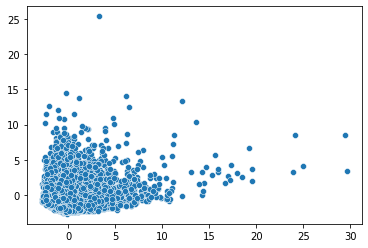

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(data)
_ = sns.scatterplot(x=pca.transform(data)[:,0], y=pca.transform(data)[:,1])

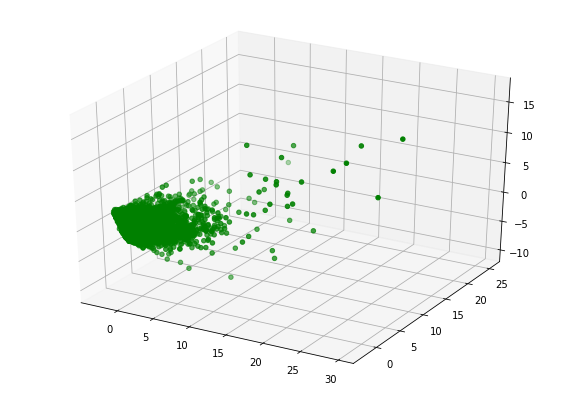

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(data)

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
_ = ax.scatter3D(pca.transform(data)[:,0], pca.transform(data)[:,1], pca.transform(data)[:,2], color = "green")